# Life Expectancy Analysis

In [103]:
# Dependencies and setup

import pandas as pd
import requests
import matplotlib.pyplot as plt

### First Dataset loaded and cleaned

In [104]:
Life_Exp_df = pd.read_csv('Resources/Life Expectancy Data - WHO.csv')

# Columns 'Life expectancy' and 'BMI' have spaces in the name 
Life_Exp_df.rename(columns={'Life expectancy ': 'Life Expectancy'}, inplace = True)
Life_Exp_df.rename(columns={' BMI ': 'BMI'}, inplace = True)

Life_Exp_df.head()

,Country,Year,Status,Life Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [105]:
# Reduce original dataframe to relevant columns only
Life_Exp_Core = Life_Exp_df[['Life Expectancy', 'Year', 'Country', 'GDP', 'Population', 'BMI']]

Life_Exp_Core.tail()

,Life Expectancy,Year,Country,GDP,Population,BMI
2933,44.3,2004,Zimbabwe,454.366654,12777511.0,27.1
2934,44.5,2003,Zimbabwe,453.351155,12633897.0,26.7
2935,44.8,2002,Zimbabwe,57.348340,125525.0,26.3
2936,45.3,2001,Zimbabwe,548.587312,12366165.0,25.9
2937,46.0,2000,Zimbabwe,547.358878,12222251.0,25.5


### 2nd Dataset loaded and cleaned

In [106]:
GDP_Growth_df = pd.read_csv('Resources/GDP Growth Data.csv')

# 'no data' rows need to be removed
# Remove columns outside of 2000 - 2015

GDP_Growth_df.tail()

,Real GDP growth (Annual percent change),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
226,Other advanced economies,3.8,4.2,2.2,4,6.6,4.3,5.5,6.5,5.5,...,2,-1.6,5.4,2.6,1.8,2.2,2.3,2.3,2.2,2.3
227,Sub-Saharan Africa,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.3,-1.7,4.8,3.9,3.6,4.2,4.1,4.2,4.3,4.4
228,World,2.1,1.9,0.7,2.6,4.6,3.6,3.6,3.9,4.7,...,2.8,-2.8,6.3,3.4,2.8,3,3.2,3.2,3.1,3
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,"©IMF, 2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Line Chart showing life expectancy over time

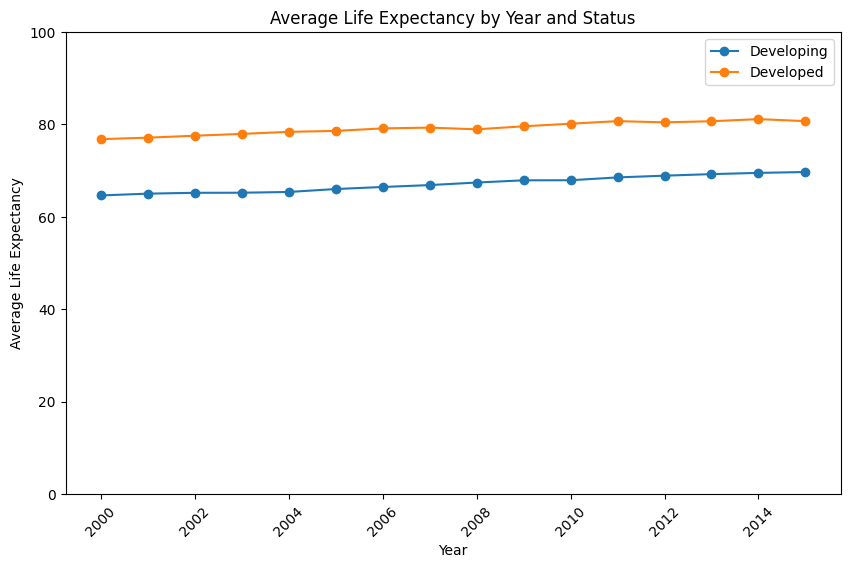

In [107]:

# Grouping by 'Year' and 'Status' and calculating average life expectancy
grouped_df = Life_Exp_df.groupby(['Year', 'Status'])['Life Expectancy'].mean().reset_index()

# Splitting the data based on 'Status'
developing_df = grouped_df[grouped_df['Status'] == 'Developing']
developed_df = grouped_df[grouped_df['Status'] == 'Developed']

# Creating the line chart
plt.figure(figsize=(10, 6))  

# Line plot for 'Developing' status
plt.plot(developing_df['Year'], developing_df['Life Expectancy'], label='Developing', marker='o')

# Line plot for 'Developed' status
plt.plot(developed_df['Year'], developed_df['Life Expectancy'], label='Developed', marker='o')

plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy by Year and Status')
plt.ylim(0, 100)
plt.legend()
plt.xticks(rotation=45) 

plt.show()

### attempt to Access World Health Organization's data directly using 'GHO' API

In [108]:

# Retrieving the list of available dimensions
# Simply specifying the /api/DIMENSION URL will provide you with the list of available dimension codes. 
# The default result is returned in the Observatory's XML schema. 

url = "https://ghoapi.azureedge.net/api/Dimension/ASSISTIVETECHSATISERVICE"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
else:
    print("Failed to fetch data. Status code:", response.status_code)

data

{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#DIMENSION/$entity',
 'Code': 'ASSISTIVETECHSATISERVICE',
 'Title': 'Satisfaction with assistive products and related services'}

In [109]:
# Attempt to request specific data

base_url = "https://frontdoor-r5quteqglawbs.azurefd.net/HEM/"

response = requests.get(base_url)

if response.status_code == 200:
    data = response.json()
else:
    print("Failed to fetch data. Status code:", response.status_code)

data

{'@odata.context': 'https://xmart-api-public-uat.who.int/HEM/$metadata',
 'value': [{'name': 'rep_covid_cfr',
   'kind': 'EntitySet',
   'url': 'rep_covid_cfr'},
  {'name': 'rep_covid_rate', 'kind': 'EntitySet', 'url': 'rep_covid_rate'},
  {'name': 'rep_ctis1', 'kind': 'EntitySet', 'url': 'rep_ctis1'},
  {'name': 'rep_ctis2', 'kind': 'EntitySet', 'url': 'rep_ctis2'},
  {'name': 'rep_ctis3', 'kind': 'EntitySet', 'url': 'rep_ctis3'},
  {'name': 'rep_dhs_ahn', 'kind': 'EntitySet', 'url': 'rep_dhs_ahn'},
  {'name': 'rep_dhs_hca', 'kind': 'EntitySet', 'url': 'rep_dhs_hca'},
  {'name': 'rep_dhs_unicef_cpr',
   'kind': 'EntitySet',
   'url': 'rep_dhs_unicef_cpr'},
  {'name': 'rep_dhs_unicef_hiv',
   'kind': 'EntitySet',
   'url': 'rep_dhs_unicef_hiv'},
  {'name': 'rep_dhs_unicef_malaria',
   'kind': 'EntitySet',
   'url': 'rep_dhs_unicef_malaria'},
  {'name': 'rep_dhs_unicef_sdh',
   'kind': 'EntitySet',
   'url': 'rep_dhs_unicef_sdh'},
  {'name': 'rep_dtp_sub', 'kind': 'EntitySet', 'url': 'r

In [110]:
# append dataset url to end of base_url

data_url = base_url + "rep_gho_tobacco"

response = requests.get(data_url)

if response.status_code == 200:
    data = response.json()
else:
    print("Failed to fetch data. Status code:", response.status_code)

print(data_url)

data



https://frontdoor-r5quteqglawbs.azurefd.net/HEM/rep_gho_tobacco


{'@odata.context': 'https://xmart-api-public-uat.who.int/HEM/$metadata#rep_gho_tobacco',
 'value': [{'ci_lb': None,
   'ci_ub': None,
   'dataset_id': 'rep_gho_tobacco',
   'date': '2018',
   'dimension': 'Sex',
   'estimate': 13.0,
   'favourable_indicator': 0,
   'flag': None,
   'indicator_abbr': 'Adult_curr_cig_smoking',
   'indicator_name': 'Current cigarette smoking among adults (%)',
   'indicator_scale': 100,
   'iso3': 'CRI',
   'ordered_dimension': 0,
   'population': None,
   'reference_subgroup': 1,
   'se': None,
   'setting': 'Costa Rica',
   'setting_average': 8.69999980926514,
   'source': 'WHO Global Health Observatory',
   'subgroup': 'Male',
   'subgroup_order': 0,
   'update': '1 March 2023',
   'wbincome2022': 'Upper middle income',
   'whoreg6': 'Americas',
   '_RecordID': '07923e71-3193-4a3f-8a77-6f6e69008605',
   'Sys_PK': -2147483648,
   'Sys_RowTitle': '-',
   'Sys_Version': 1,
   'Sys_VersionID': '07923E71-3193-4A3F-8A77-6F6E69008605.1',
   'Sys_OriginCode': 